# Task - 1: Implementation of MCP Neurons

# Handcraft a Threshold values for ”AND” function

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  aggregated_input=[x1+x2 for x1,x2 in zip(X1,X2)]
  state_neuron=[]
  for value in aggregated_input:
    if value>=T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)
# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


# Handcraft a Threshold values for ”OR” function

In [ ]:
def MCP_Neurons_OR(X1, X2, T):
  """
  This function implements basic OR operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1D array): An array of binary values.
  X2 (1D array): An array of binary values.
  Output:
  state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
  """
  assert len(X1) == len(X2)
  aggregated_input=[x1+x2 for x1,x2 in zip(X1,X2)]
  state_neuron=[]
  for value in aggregated_input:
    if value>=T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1 # Threshold value for OR gate
# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)
# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


**Question - 1: List out all the limitations of MCP - Neurons.**
Answer: Limitations of MCP is given below:

1.   Linear separability: MCP neurons can only solve linearly seperable problems
2.   Lack of Learning: MCP neurons rely on manually assigned weights and threshold, without learning mechanism.
3. No concept of Time: MCP neurons processes static inputs and cannot handle sequential or time-dependent data.
4. Limited activation functions: MCP neurons use only a simple step activation function, lacking modern alternatives like sigmoid or ReLU.
5. Poor scability: Manually setting thresholds and wwights becomes impractical as the number of inputs increases.

# Question - 2:
Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

An MCP neueon cannot solve XOR directly because XOR is not a simple yes or no decision like AND or OR. However, we can devise if-else rule to implement XOR function using logical steps. Since, XOR is 1 only when inputs are different i.e. (0,1 or 1,0).

## Task 2: Perceptron Algorithm for 0 vs 1 Classification.

In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI/mnist_0_and_1.csv")
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


**Question - 1: What does the shape of X represent?**

Answer: The shape of X (12665, 784) represents that it consist of 12,665 images with 784 dimensional feature vector.

**Question - 2: What does the shape of Y represent?**

Answer: The shape of Y (12665,) means it contains 12,655 labels, each of those correlating to one imahe in X. Each label is either 0 or 1 representinf the numerics in the images.

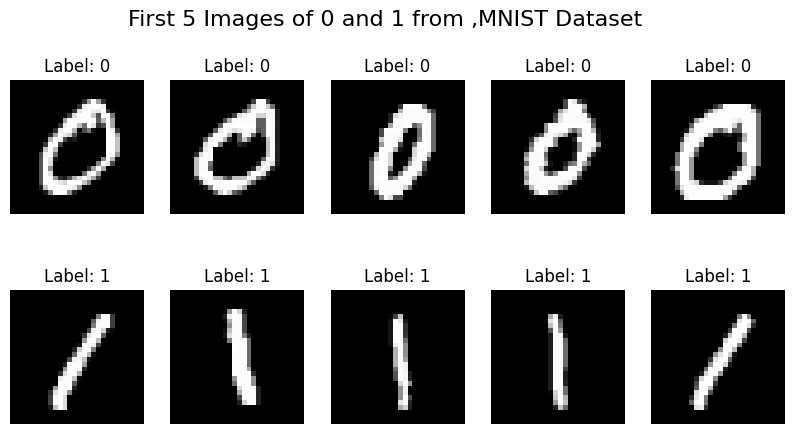

In [ ]:
import matplotlib.pyplot as plt
images_0=X[y==0]
images_1=X[y==1]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
  print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
  for i in range(5):
    # Plot digit 0
    axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 0")
    axes[0, i].axis("off")
    # Plot digit 1
    axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 1")
    axes[1, i].axis("off")
plt.suptitle("First 5 Images of 0 and 1 from ,MNIST Dataset", fontsize=16)
plt.show()

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Question 3:
What does the weights array represent in this context?

Answer: The weight array represents the importance of each pixel in predicting if the image is either 0 or 1.

# Question 4:
Why are we initializing the weights to zero? What effect could this have on the training process?

Answer: We initialize the weight to zero for a simple approach. If the model learns that weights are zero for all inputs, this will make the training less efficient. Hence, it is effective to initialize randomly for the model to learn better and compute efficiently.

# Implementing a decision function

In [ ]:
import numpy as np
def decision_function(X, weights, bias):
  """
  Compute the predicted labels for the input data.
  Parameters:
  - X: Features (input data) as a numpy array of shape (n_samples, n_features)
  - weights: Updated weights after training
  - bias: Updated bias after training
  Returns:
  - y_pred_all: The predicted labels for the input data
  """
  predictions = np.dot(X, weights) + bias
  y_pred_all = np.where(predictions >= 0,1,0)
  return y_pred_all

In [ ]:
import numpy as np
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
  """
  Train the perceptron using the Perceptron Learning Algorithm.
  Parameters:
  - X: Features (input data) as a numpy array of shape (n_samples, n_features)
  - y: Labels (true output) as a numpy array of shape (n_samples,)
  - weights: Initial weights as a numpy array of shape (n_features,)
  - bias: Initial bias value (scalar)
  - learning_rate: Learning rate for weight updates (default is 0.1)
  - epochs: Number of iterations to train the model (default is 100)
  Returns:
  - weights: Updated weights after training
  - bias: Updated bias after training
  - accuracy: Total correct prediction.
  """
  # Step 3: Perceptron Learning Algorithm
  for epoch in range(epochs):
    correct_predictions = 0

    for i in range(len(X)):
      prediction=np.dot(X[i], weights)+bias
      y_pred=1 if prediction >= 0 else 0

      if y_pred == y[i]:
        correct_predictions +=1

      else:
        weights += learning_rate * (y[i] - y_pred) * X[i]
        bias += learning_rate * (y[i] -y_pred)
      accuracy=correct_predictions/len(X)
  return weights, bias, accuracy

# Question - 5
**What is the purpose of the output = np.dot(X[i], weights) + bias line?**

Answer: The line output = np.dot(X[i], weights) + bias line calculates the weighted sum of inputs. This helps to determine weither the input should be 0 or 1 on the step function.

# Question - 6
What happens when the prediction is wrong? How are the weights and
bias updated? **bold text**

Answer: When the prediction is wrong, the weighhts and bias are updated to reduce future errors. The weights and bias are updated according to:

weights=weights+learning_rate * (y[i] - prediction) * X[i]
bias = bias+learning_rate * (y[i] - prediction)


# Question - 7
**Why is the final accuracy important, and what do you expect it to be?**

Answer: The final accurracy show how well the model has learned to classify the training data after all the updates during training. If the data can be seperated by a line, accuracy should be 100%. If not, accuracy may be lower.

In [ ]:
X=np.array([
    [2, 3],
    [1, 5],
    [2, 1],
     [3, 4]
])

y=np.array([1, 1, 0, 1])

weights=np.zeros(X.shape[1])
bias=0

weights, bias, accuracy = train_perceptron(X, y, weights, bias)

print("The final weights are:", weights)
print("The final bias is:", bias)
print("The final accuracy is: ", accuracy)

The final weights are: [0. 0.]
The final bias is: 0.0
The final accuracy is:  0.25


In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
  print("\nMisclassified Samples:")
  for idx in misclassified_idx:
    print(f"Index {idx}: Predicted={y_pred[idx]}, True={y[idx]}, Features={X[idx]}")
  plt.show()
else:
  print("All images were correctly classified!")

Final Accuracy: 0.7500

Misclassified Samples:
Index 2: Predicted=1, True=0, Features=[2 1]


# Question - 8
**What does misclassified idx store, and how is it used in this code?**

Answer: The misclassified idx stores the indexex of the sampkes where the prediction was wrong. The misclassified idx is used to display misclassified samples by printint them in the above code.

# Question - 9
**How do you interpret the result if the output is ”All images were correctly classified!”?**

Answer: This means that the model predicted all samples correctly on the given datasets.

## Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI/mnist_3_and_5.csv")

X=data.iloc[:, 1:].values
y=data.iloc[:, 0].values

y=np.where(y==3, 0, 1)

print(f"Dataset loaded! Number of samples: {len(y)}")
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Dataset loaded! Number of samples: 2741
Shape of X: (2741, 784), Shape of y: (2741,)


In [ ]:
X = X / 225.0

In [ ]:
weights = np.zeros(X.shape[1])
bias=0
learning_rate=0.01
epochs=100

In [ ]:
def train_perceptron(X,y, weights, bias, learning_rate=0.1, epochs=100):
  for epoch in range(epochs):
    correct_predictions = 0

    for i in range(len(X)):
      prediction=np.dot(X[i], weights)+bias
      y_pred=1 if prediction >= 0 else 0

      if y_pred == y[i]:
        correct_predictions +=1

      else:
        weights += learning_rate * (y[i] - y_pred) * X[i]
        bias += learning_rate * (y[i] - y_pred)

      accuracy = correct_predictions /len(X)
      return weights, bias, accuracy

In [ ]:
weights, bias, accuracy= train_perceptron(X, y, weights, bias, learning_rate, epochs)
print("Training completed!")
print("Finale training accuracy", accuracy)

Training completed!
Finale training accuracy 0.00036483035388544326


Number of misclassified samples: 1
Plotting index [], shape [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        

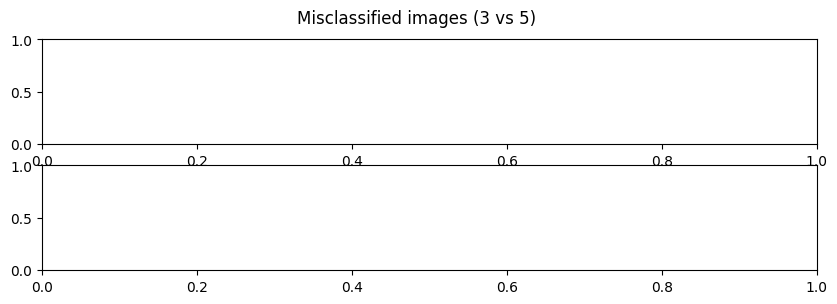

In [ ]:
misclassified_idx = np.where(y_pred != y [0])

if len(misclassified_idx) > 0:
  print(f"Number of misclassified samples: {len(misclassified_idx)}")
  fig, axes=plt.subplots(2, len(misclassified_idx[:5]), figsize=(10, 3))

  if len(misclassified_idx)==1:
    axes=axes.reshape(1, -1)

  for ax, idx in zip(axes, misclassified_idx[:5]):
    print(f"Plotting index {idx}, shape {X[idx.shape]}")

    if X[idx].size == 784:
      ax.imshow(X[idx].reshape(28, 28), cmap="gray")
      ax.set_title(f"Pred: {y_pred[idx]}, True: {[idx]}")
      ax.axis("off")

    else:
      print(f"Warning: Sample at index {idx} does not have 784 features! Shape is {X[idx.shape]}")

  plt.suptitle("Misclassified images (3 vs 5)")
  plt.show()

else:
  print("All images were correctly classified!")